# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition

from yellowbrick.cluster import KElbowVisualizer

Matplotlib is building the font cache; this may take a moment.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df_laptop = pd.read_csv('https://raw.githubusercontent.com/nfach98/LaptopClustering/refs/heads/main/laptop-specs.csv')
df_laptop.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,Process (nm),Cores (Shaders),Base Clock (MHz),Memory Size (GB),Memory Type,Memory Bus Width (bits),TDP (W),Integrated GPU,Mobile GPU,QTY
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,14,48 Execution Units,Up to 1050,Shared,NaN,NaN,15,Yes,Yes,1
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,14,48 Execution Units,Up to 1000,Shared,NaN,NaN,15,Yes,Yes,1
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,14,24 Execution Units,Up to 1050,Shared,NaN,NaN,15,Yes,Yes,1
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,14,768 Stream Processors,855,2,GDDR5,128,35,No,Yes,1
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,14,48 Execution Units,Up to 1100,Shared,NaN,NaN,28,Yes,Yes,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1275 non-null   object 
 1   Product                  1275 non-null   object 
 2   TypeName                 1275 non-null   object 
 3   Inches                   1275 non-null   float64
 4   Ram                      1275 non-null   int64  
 5   OS                       1275 non-null   object 
 6   Weight                   1275 non-null   float64
 7   Price_euros              1275 non-null   float64
 8   Screen                   1275 non-null   object 
 9   ScreenW                  1275 non-null   int64  
 10  ScreenH                  1275 non-null   int64  
 11  Touchscreen              1275 non-null   object 
 12  IPSpanel                 1275 non-null   object 
 13  RetinaDisplay            1275 non-null   object 
 14  CPU_company             

In [4]:
print("\nMissing values:")
misses = df_laptop.isnull().sum()
misses = misses[misses > 0]
misses


Missing values:


Base Clock (MHz)            12
Memory Type                737
Memory Bus Width (bits)    737
TDP (W)                      1
dtype: int64

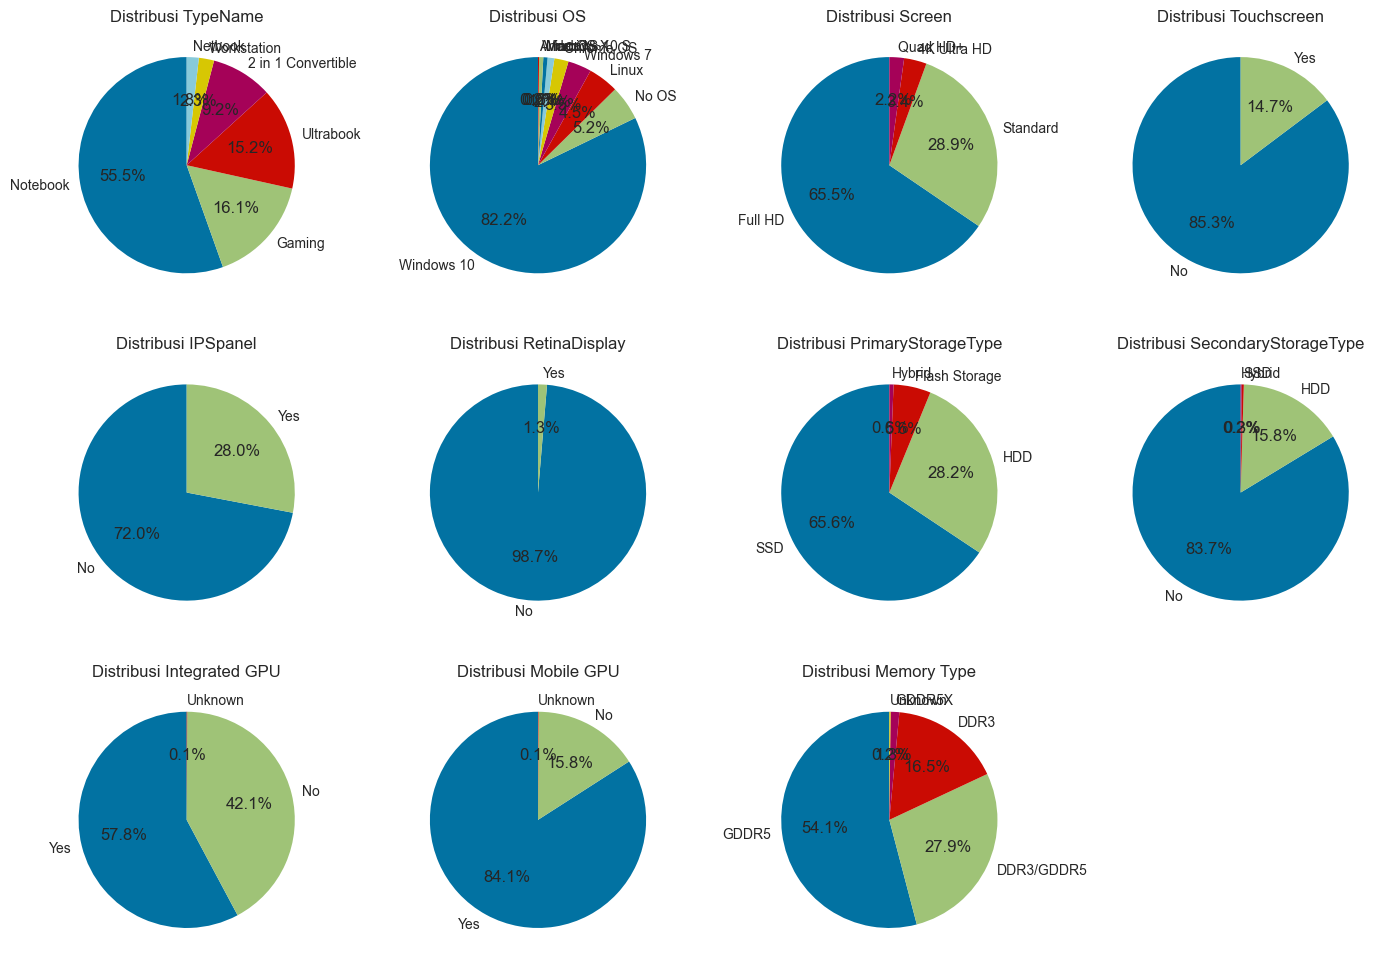

In [5]:
categoricals = ['TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'PrimaryStorageType', 'SecondaryStorageType', 'Integrated GPU', 'Mobile GPU', 'Memory Type']
plt.figure(figsize=(14, 10))

for i, column in enumerate(categoricals, 1):
  df_types = df_laptop[column].value_counts()
  plt.subplot(3, 4, i)
  plt.pie(df_types, labels=df_types.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

In [6]:
df_laptop.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,QTY
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.0
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020,1.0
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655,0.0
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000,1.0
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000,1.0
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000,1.0
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000,1.0
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000,1.0


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
df_laptop = df_laptop[~pd.to_numeric(df_laptop['Year'], errors='coerce').isnull()]
df_laptop['Year'] = df_laptop['Year'].astype(str).astype(int)

In [8]:
df_laptop = df_laptop[~df_laptop['Base Clock (MHz)'].isnull()]
df_base = df_laptop.loc[pd.to_numeric(df_laptop['Base Clock (MHz)'], errors='coerce').isnull()]
list(set(df_base['Base Clock (MHz)']))

['Up to 600',
 'Various',
 'Up to 750',
 'Up to 650',
 'Up to 1150',
 'Up to 800',
 'Up to 950',
 'Up to 700',
 'Unknown',
 'Up to 900',
 'Up to 1050',
 'Up to 1100',
 'Up to 1000']

In [9]:
df_laptop = df_laptop.drop(df_laptop[df_laptop['Base Clock (MHz)'].str.contains('Various')].index)
df_laptop = df_laptop.drop(df_laptop[df_laptop['Base Clock (MHz)'].str.contains('Unknown')].index)
df_laptop['Base Clock (MHz)'] = df_laptop['Base Clock (MHz)'].apply(lambda x :x.replace('Up to ','') if 'Up to ' in x else x)
df_laptop['Base Clock (MHz)'] = df_laptop['Base Clock (MHz)'].astype(str).astype(int)

In [10]:
df_base = df_laptop.loc[pd.to_numeric(df_laptop['TDP (W)'], errors='coerce').isnull()]
list(set(df_base['TDP (W)']))

['15-25', '45-65', '~25', '15-20']

In [11]:
df_laptop['TDP (W)'] = df_laptop['TDP (W)'].apply(lambda x :x.split('-')[1] if '-' in x else x)
df_laptop['TDP (W)'] = df_laptop['TDP (W)'].apply(lambda x :x.replace('~','') if '~' in x else x)
df_laptop['TDP (W)'] = df_laptop['TDP (W)'].astype(str).astype(float)

In [12]:
df_base = df_laptop.loc[pd.to_numeric(df_laptop['Memory Bus Width (bits)'], errors='coerce').isnull()]
list(set(df_base['Memory Bus Width (bits)']))

['256x2', nan, '64/128']

In [13]:
df_laptop['Memory Bus Width (bits)'] = df_laptop['Memory Bus Width (bits)'].fillna('0')
df_laptop['Memory Bus Width (bits)'] = df_laptop['Memory Bus Width (bits)'].apply(lambda x :x.split('/')[1] if '/' in x else x)
df_laptop['Memory Bus Width (bits)'] = df_laptop['Memory Bus Width (bits)'].apply(lambda x :int(x.replace('x2','')) * 2  if 'x2' in x else x)
df_laptop['Memory Bus Width (bits)'] = df_laptop['Memory Bus Width (bits)'].astype(str).astype(int)

In [14]:
df_base = df_laptop.loc[pd.to_numeric(df_laptop['Memory Size (GB)'], errors='coerce').isnull()]
list(set(df_base['Memory Size (GB)']))

['Up to 2', '3/6', 'Up to 4', '1/2', '2/4', '4x2', '4/8', 'Shared']

In [14]:
df_laptop['Memory Size (GB)'] = df_laptop['Memory Size (GB)'].apply(lambda x :'0' if x == 'Shared' else x)
df_laptop['Memory Size (GB)'] = df_laptop['Memory Size (GB)'].apply(lambda x :x.split('/')[1] if '/' in x else x)
df_laptop['Memory Size (GB)'] = df_laptop['Memory Size (GB)'].apply(lambda x :x.replace('Up to ','')  if 'Up to ' in x else x)
df_laptop['Memory Size (GB)'] = df_laptop['Memory Size (GB)'].apply(lambda x :int(x.replace('x2','')) * 2  if 'x2' in x else x)
df_laptop['Memory Size (GB)'] = df_laptop['Memory Size (GB)'].astype(str).astype(int)

In [15]:
df_base = df_laptop.loc[pd.to_numeric(df_laptop['Memory Type'], errors='coerce').isnull()]
list(set(df_base['Memory Type']))

['DDR3', 'DDR3/GDDR5', 'GDDR5', nan, 'GDDR5X']

In [16]:
df_laptop['Memory Type'] = df_laptop['Memory Type'].fillna('No')
df_laptop['Memory Type'] = df_laptop['Memory Type'].apply(lambda x :x.split('/')[1] if '/' in x else x)

In [17]:
df_base = df_laptop.loc[pd.to_numeric(df_laptop['Process (nm)'], errors='coerce').isnull()]
list(set(df_base['Process (nm)']))

['14/16']

In [18]:
df_laptop['Process (nm)'] = df_laptop['Process (nm)'].apply(lambda x :x.split('/')[1] if '/' in x else x)
df_laptop['Process (nm)'] = df_laptop['Process (nm)'].astype(str).astype(int)

In [19]:
df_laptop.index = range(len(df_laptop))

In [177]:
df_scaled = df_laptop.copy()
df_scaled.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,Process (nm),Cores (Shaders),Base Clock (MHz),Memory Size (GB),Memory Type,Memory Bus Width (bits),TDP (W),Integrated GPU,Mobile GPU,QTY
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,14,48 Execution Units,1050,0,No,0,15.0,Yes,Yes,1
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,14,48 Execution Units,1000,0,No,0,15.0,Yes,Yes,1
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,14,24 Execution Units,1050,0,No,0,15.0,Yes,Yes,1
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,14,768 Stream Processors,855,2,GDDR5,128,35.0,No,Yes,1
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,14,48 Execution Units,1100,0,No,0,28.0,Yes,Yes,1


In [178]:
# Ordinal encoding
types = {'Netbook': 0, 'Notebook': 1, 'Ultrabook': 2, '2 in 1 Convertible': 3, 'Gaming': 4, 'Workstation': 5}
df_scaled['TypeName'] = df_scaled['TypeName'].replace(types)

screens = {'Standard': 0, 'Full HD': 1, 'Quad HD+': 2, '4K Ultra HD': 3}
df_scaled['Screen'] = df_scaled['Screen'].replace(screens)

primary_storages = {'Flash Storage': 0, 'HDD': 1, 'Hybrid': 2, 'SSD': 3}
df_scaled['PrimaryStorageType'] = df_scaled['PrimaryStorageType'].replace(primary_storages)

second_storages = {'No': 0, 'HDD': 1, 'Hybrid': 2, 'SSD': 3}
df_scaled['SecondaryStorageType'] = df_scaled['SecondaryStorageType'].replace(second_storages)

memory_types = {'0': 0, 'DDR3': 1, 'GDDR5': 2, 'GDDR5X': 3}
df_scaled['Memory Type'] = df_scaled['Memory Type'].replace(memory_types)

os = []
for s in df_scaled['OS']:
  if s == 'No OS':
    os.append(0)
  elif s == 'Android':
    os.append(1)
  elif s == 'Linux':
    os.append(2)
  elif s == 'Chrome OS':
    os.append(3)
  elif 'Windows' in s:
    os.append(4)
  elif 'mac' in s.lower():
    os.append(5)

df_scaled['OS'] = os

C:\Users\Nitro\AppData\Local\Temp\ipykernel_6220\418971467.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scaled['TypeName'] = df_scaled['TypeName'].replace(types)
C:\Users\Nitro\AppData\Local\Temp\ipykernel_6220\418971467.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scaled['Screen'] = df_scaled['Screen'].replace(screens)
C:\Users\Nitro\AppData\Local\Temp\ipykernel_6220\418971467.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavio

In [179]:
numeric_features = df_scaled.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])

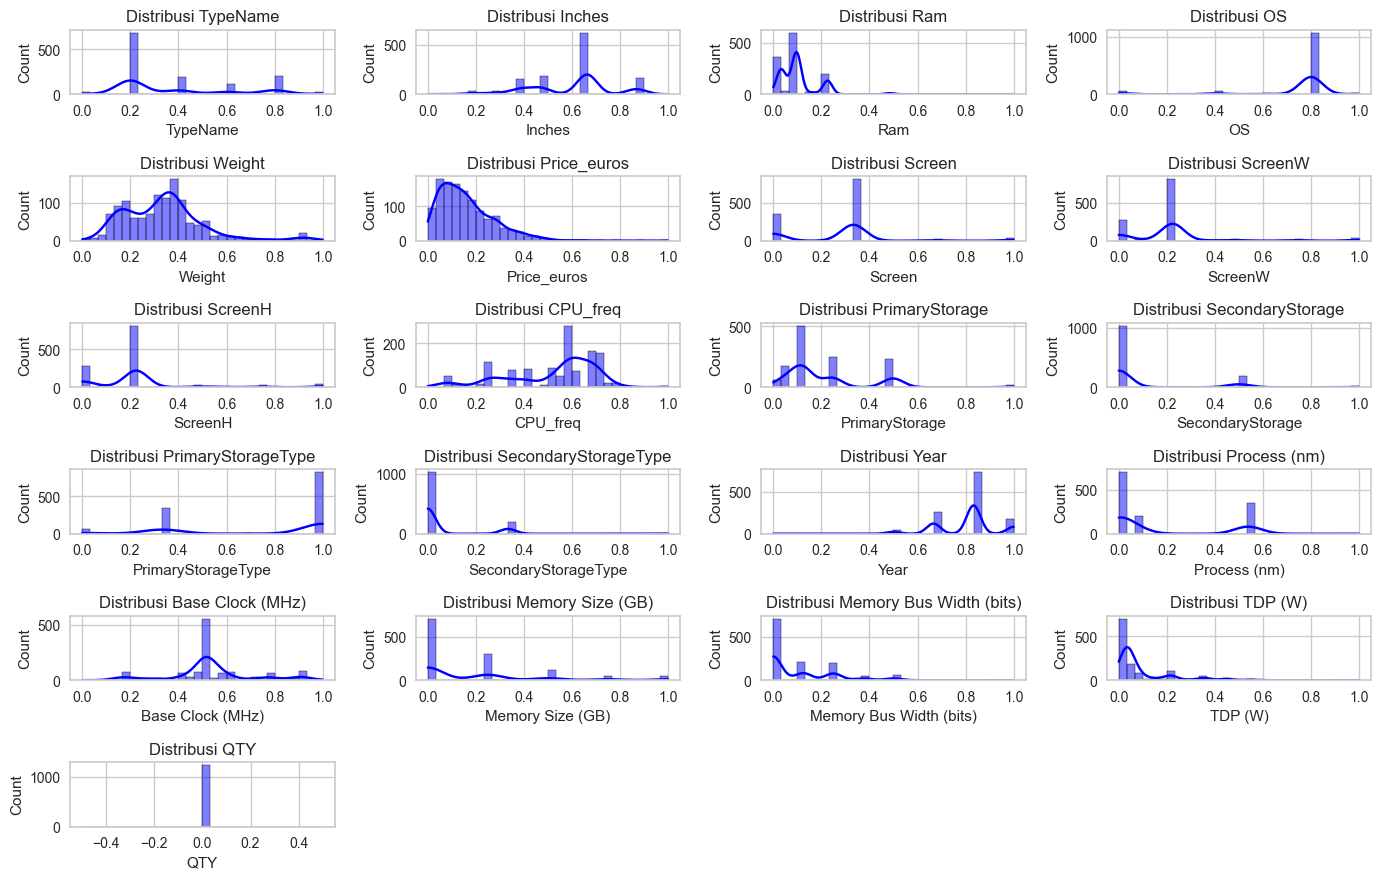

In [180]:
plt.figure(figsize=(14, 10))

for i, column in enumerate(numeric_features, 1):
  plt.subplot(7, 4, i)
  sns.histplot(df_scaled[column], bins=30, kde=True, color='blue')
  plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [181]:
bool_columns = ['Touchscreen', 'IPSpanel', 'RetinaDisplay', 'Integrated GPU', 'Mobile GPU']
for col in bool_columns:
  df_scaled[col] = df_scaled[col].map({'Yes': 1, 'No': 0})

In [182]:
df_scaled = df_scaled.drop('QTY', axis=1)
df_scaled.describe()

,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,...,PrimaryStorageType,SecondaryStorageType,Year,Process (nm),Base Clock (MHz),Memory Size (GB),Memory Bus Width (bits),TDP (W),Integrated GPU,Mobile GPU
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,...,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,0.378352,0.593135,0.104956,0.739257,0.336830,0.161184,0.268982,0.217684,0.221443,0.149435,...,0.763328,0.057889,0.807620,0.161924,0.535855,0.183158,0.101878,0.090060,0.575121,0.836834
std,0.248097,0.172623,0.081965,0.197134,0.167461,0.117840,0.213372,0.200657,0.204818,0.356660,...,0.342883,0.135916,0.120025,0.235969,0.174364,0.268843,0.143605,0.115245,0.494524,0.369667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.469880,0.032258,0.800000,0.201995,0.072407,0.000000,0.223929,0.224138,0.000000,...,0.333333,0.000000,0.666667,0.000000,0.496111,0.000000,0.000000,0.032258,0.000000,1.000000
50%,0.200000,0.662651,0.096774,0.800000,0.336658,0.136463,0.333333,0.223929,0.224138,0.000000,...,1.000000,0.000000,0.833333,0.000000,0.518583,0.000000,0.000000,0.032258,1.000000,1.000000
75%,0.600000,0.662651,0.096774,0.800000,0.403990,0.221276,0.333333,0.223929,0.224138,0.000000,...,1.000000,0.000000,0.833333,0.538462,0.580812,0.250000,0.250000,0.093702,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [183]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1238 non-null   object 
 1   Product                  1238 non-null   object 
 2   TypeName                 1238 non-null   float64
 3   Inches                   1238 non-null   float64
 4   Ram                      1238 non-null   float64
 5   OS                       1238 non-null   float64
 6   Weight                   1238 non-null   float64
 7   Price_euros              1238 non-null   float64
 8   Screen                   1238 non-null   float64
 9   ScreenW                  1238 non-null   float64
 10  ScreenH                  1238 non-null   float64
 11  Touchscreen              1238 non-null   int64  
 12  IPSpanel                 1238 non-null   int64  
 13  RetinaDisplay            1238 non-null   int64  
 14  CPU_company             

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [184]:
X = df_scaled.select_dtypes(include=['number']).values
X.shape

(1238, 25)

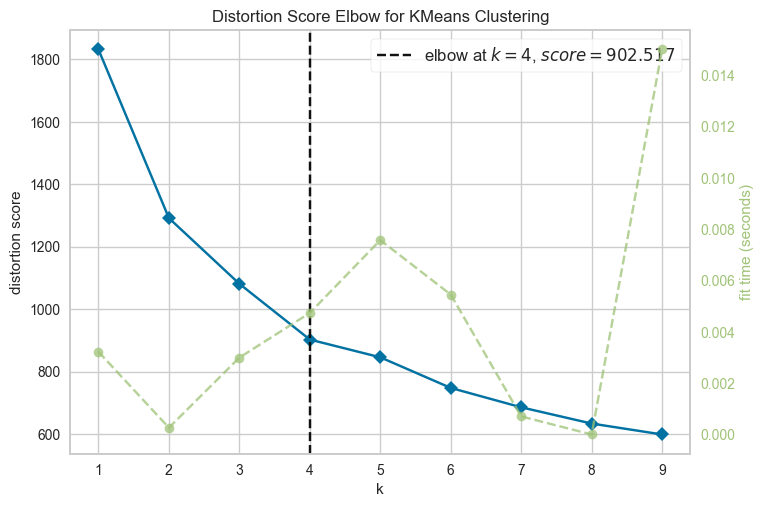

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [185]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [186]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_



## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [187]:
s =  silhouette_score(X, labels)
print("Silhouette Scores:", s)

Silhouette Scores: 0.30669962710775267


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [188]:
df_pre = df_scaled.copy()
df_pre['Cluster'] = labels
df_pre.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,Process (nm),Cores (Shaders),Base Clock (MHz),Memory Size (GB),Memory Type,Memory Bus Width (bits),TDP (W),Integrated GPU,Mobile GPU,Cluster
0,Apple,MacBook Pro,0.4,0.385542,0.096774,1.0,0.169576,0.194307,0.000000,0.482619,...,0.0,48 Execution Units,0.518583,0.00,No,0.00,0.032258,1,1,3
1,Apple,Macbook Air,0.4,0.385542,0.096774,1.0,0.162095,0.119693,0.000000,0.029911,...,0.0,48 Execution Units,0.475367,0.00,No,0.00,0.032258,1,1,0
2,HP,250 G6,0.2,0.662651,0.096774,0.0,0.291771,0.064854,0.333333,0.223929,...,0.0,24 Execution Units,0.518583,0.00,No,0.00,0.032258,1,1,0
3,Apple,MacBook Pro,0.4,0.638554,0.225806,1.0,0.284289,0.397073,0.000000,0.611964,...,0.0,768 Stream Processors,0.350043,0.25,2,0.25,0.093702,0,1,1
4,Apple,MacBook Pro,0.4,0.385542,0.096774,1.0,0.169576,0.272841,0.000000,0.482619,...,0.0,48 Execution Units,0.561798,0.00,No,0.00,0.072197,1,1,3


In [189]:
X = df_pre.select_dtypes(include=['number']).drop(['Cluster'], axis=1).values
y = df_pre['Cluster'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

threshold = 0.03
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

features = []

print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
  col = df_pre.select_dtypes(include=['number']).columns[i]
  features.append(col)
  print(f"{col}: {importances[i]}")

# features.extend(['Ram', 'CPU_freq'])

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
TypeName: 0.08256182188231267
Touchscreen: 0.12171035648672969
Process (nm): 0.10234878626423871
Base Clock (MHz): 0.047143143359814114
Memory Size (GB): 0.09306470446941402
Memory Bus Width (bits): 0.08099711655137014
TDP (W): 0.10496307699177208
Integrated GPU: 0.11662461441412157
Mobile GPU: 0.07700773651273853


In [190]:
df_select = df_scaled[features]
df_select = df_select.select_dtypes(include=['number'])
df_select.head()

,TypeName,Touchscreen,Process (nm),Base Clock (MHz),Memory Size (GB),Memory Bus Width (bits),TDP (W),Integrated GPU,Mobile GPU
0,0.4,0,0.0,0.518583,0.00,0.00,0.032258,1,1
1,0.4,0,0.0,0.475367,0.00,0.00,0.032258,1,1
2,0.2,0,0.0,0.518583,0.00,0.00,0.032258,1,1
3,0.4,0,0.0,0.350043,0.25,0.25,0.093702,0,1
4,0.4,0,0.0,0.561798,0.00,0.00,0.072197,1,1


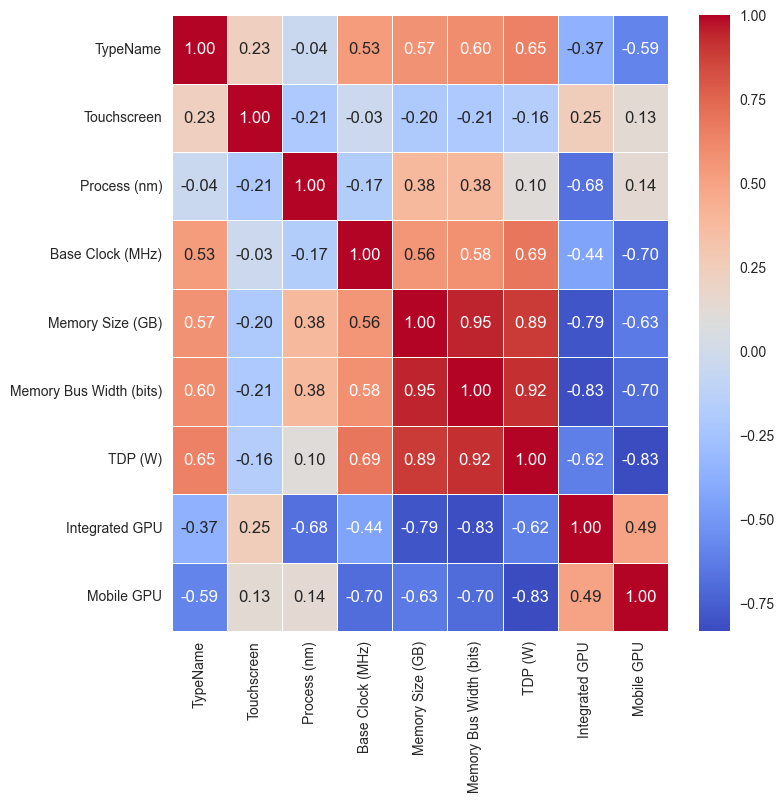

In [191]:
plt.figure(figsize=(8, 8))
dataplot = sns.heatmap(df_select.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [192]:
X_select = df_select.values
X_select.shape

(1238, 9)

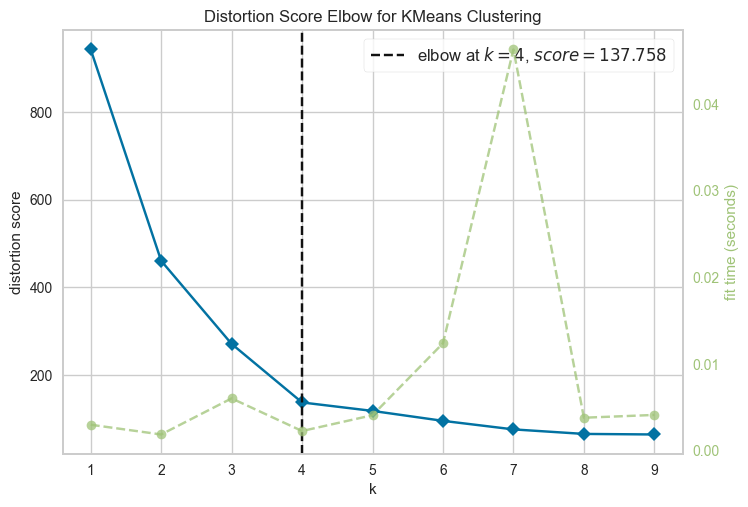

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [193]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_select)
visualizer.show()

In [194]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_select)
labels = kmeans.labels_
s = silhouette_score(X_select, labels)
print(f"Silhouette Scores on k={k}: {s}")

Silhouette Scores on k=4: 0.7143432118045902


In [195]:
cluster_ids = []
for cluster_id in range(k):
  ids = [i for i in range(len(df_laptop)) if labels[i] == cluster_id]
  cluster_ids.append(ids)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

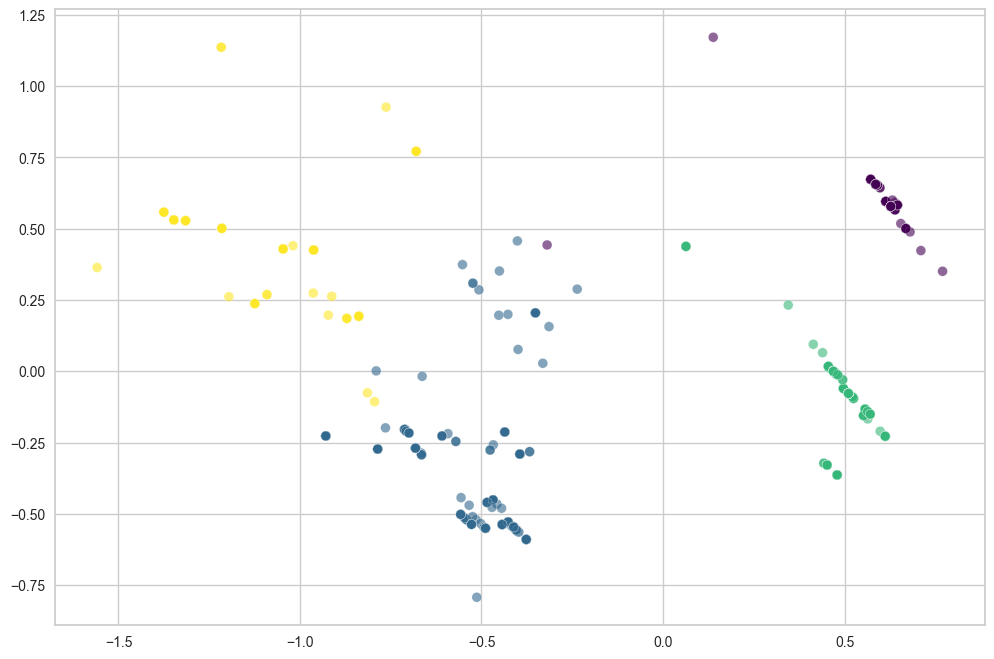

In [196]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_select)
X = pca.transform(X_select)

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [197]:
clusters = []
for cluster_id in range(k):
  cluster_data = df_laptop.loc[cluster_ids[cluster_id]]
  cluster_scaled = df_scaled.loc[cluster_ids[cluster_id]]

  dict_cluster = {
    'id': cluster_id,
    'count': len(cluster_data)
  }

  for col in df_scaled.select_dtypes(include=['number']).columns:
    data = cluster_data[col]
    if data.dtype == 'object':
      data = cluster_scaled[col]

    dict_cluster[col] = data.mean()

  clusters.append(dict_cluster)

In [216]:
print("Analisis Cluster:")
for c in clusters:
  print(f"\nCluster {c['id'] + 1} ({c['count']} Laptop):")

  type_code = c['TypeName'].mean() * 5 - 1
  type = list(types.keys())[round(type_code)]
  touchsreeen = 'Ya' if round(c['Touchscreen'].mean()) == 1 else 'Tidak'
  integrated_gpu = 'Ya' if round(c['Integrated GPU'].mean()) == 1 else 'Tidak'
  
  print(f"Rata-rata tipe: {type} ({round(type_code)})")
  print(f"Rata-rata fabrikasi prosesor: {c['Process (nm)'].mean():.2f} nm")
  print(f"Rata-rata touchscreen: {touchsreeen}")
  print(f"Rata-rata kecepatan GPU: {c['Base Clock (MHz)'].mean():.2f} MHz")
  print(f"Rata-rata memory GPU: {c['Memory Size (GB)'].mean():.2f} GB")
  print(f"Rata-rata TDP: {c['TDP (W)'].mean():.2f} W")
  print(f"Rata-rata Integrated GPU: {integrated_gpu}")

Analisis Cluster:

Cluster 1 (161 Laptop):
Rata-rata tipe: Ultrabook (2)
Rata-rata fabrikasi prosesor: 14.01 nm
Rata-rata touchscreen: Ya
Rata-rata kecepatan GPU: 1033.34 MHz
Rata-rata memory GPU: 0.01 GB
Rata-rata TDP: 13.36 W
Rata-rata Integrated GPU: Ya

Cluster 2 (328 Laptop):
Rata-rata tipe: Notebook (1)
Rata-rata fabrikasi prosesor: 27.09 nm
Rata-rata touchscreen: Tidak
Rata-rata kecepatan GPU: 1038.92 MHz
Rata-rata memory GPU: 2.72 GB
Rata-rata TDP: 33.98 W
Rata-rata Integrated GPU: Tidak

Cluster 3 (552 Laptop):
Rata-rata tipe: Netbook (0)
Rata-rata fabrikasi prosesor: 14.81 nm
Rata-rata touchscreen: Tidak
Rata-rata kecepatan GPU: 983.70 MHz
Rata-rata memory GPU: 0.00 GB
Rata-rata TDP: 14.02 W
Rata-rata Integrated GPU: Ya

Cluster 4 (197 Laptop):
Rata-rata tipe: 2 in 1 Convertible (3)
Rata-rata fabrikasi prosesor: 16.39 nm
Rata-rata touchscreen: Tidak
Rata-rata kecepatan GPU: 1393.43 MHz
Rata-rata memory GPU: 4.67 GB
Rata-rata TDP: 105.71 W
Rata-rata Integrated GPU: Tidak


Tulis hasil interpretasinya di sini.
1. Cluster 1 - **Laptop Profesional**:
   
   Karakteristik rata-rata:
   - Tipe: Ultrabook (2)
   - Fabrikasi prosesor: 14.01 nm
   - Touchscreen
   - Kecepatan GPU: 1033.34 MHz
   - Memory GPU: 0.01 GB
   - Daya prosesor: 13.36 W
   - GPU Integrated

   Analisis:
   Merupakan cluster untuk laptop dengan rata-rata tipe Ultrabook, menggunakan fabrikasi prosesor yang sudah kecil (14 nm) dan daya prosesor ringan sekali (13 W). Untuk GPU walaupun kecepatan lumayan di kisaran 1033 MHz, tetapi bukan merupakan GPU diskrit dan masih terintegrasi dengan prosesor utama. Meskipun begitu memiliki fitur layar sentuh/touchscreen.

   Karakter ini mirip dengan laptop produktifitas sedang untuk penggunaan profesional, seperti kantor, instansi, rapat, maupun acara resmi. Meskipun daya komputasinya rendah jika melihat spesifikasinya, tetapi sudah menggunakan fabrikasi yang modern dan efisien serta bertipe Ultrabook yang biasanya secara tampilan lebih berkesan resmi dan elegan. Umumnya memang hanya digunakan untuk pekerjaan yang tidak berat, tetapi sudah sangat cukup karena efisien dan tidak butuh daya tinggi. Umumnya yang dicari dari laptop ini adalah efisiensi, tampilan, serta fitur yang memudahkan seperti layar sentuh. Laptop seperti ini biasanya harganya lebih tinggi dibanding dengan laptop pada umumnya.
   

2. Cluster 2 - **Laptop Umum**:
   
   Karakteristik rata-rata:
   - Tipe: Notebook (1)
   - Fabrikasi prosesor: 27.09 nm
   - Tidak ada touchscreen
   - Kecepatan GPU: 1038.92 MHz
   - Memory GPU: 2.72 GB
   - Daya prosesor: 33.98 W
   - GPU Diskret
  
   Analisis:
   Karakter dalam cluster ini cukup terlihat walaupun tidak terlalu spesial secara angka dan fitur. Bertipe notebook biasa dan tidak ada fitur touchscreen. Fabrikasi prosesor masih cukup besar di angka 27 nm. Daya prosesor sedang, di kisaran 34 W. Sudah dilengkapi GPU diskrit walaupun secara kecepatan (1038 Mhz) serta memori (2 GB) juga bisa dibilang tidak terlalu tinggi.

   Cluster ini kemungkinan adalah laptop untuk produktifitas ringan hingga sedang, misal untuk sekolah, pekerjaan kantor, atau editing dan gaming ringan. Tipe laptop seperti ini adalah yang paling umum dijumpai, karena masih memiliki daya yang lumayan untuk melakukan pekerjaan sehingga cukup untuk kebutuhan orang-orang pada umumnya. Terlihat dari prosesor yang belum efisien tetapi memliki daya cukup dan GPU khusus, memungkinan sedikit tambahan beban pekerjaan. Laptop seperti ini masih cukup mudah untuk dijangkau secara harga.


3. Cluster 3 - **Laptop Low-End**:
   
   Karakteristik rata-rata:
   - Tipe: Netbook (0)
   - Fabrikasi prosesor: 14.81 nm
   - Tidak ada touchscreen
   - Kecepatan GPU: 983.70 MHz
   - Memory GPU: 0.00 GB
   - Daya prosesor: 14.02 W
   - GPU Integrated

   Analisis:
   Laptop yang termasuk dalam cluster ini adalah laptop bertipe netbook dengan daya cukup rendah (~14 W) dan tidak memliki fitur touchscreen. Cluster ini walaupun mempunyai fabrikasi prosesor yang cukup efisien di angka sekitar 15 nm dan dengan kecepatan Base Clock GPU yang cukup, tetapi tidak memiliki GPU diskrit/khusus, melainkan terintegrasi di dalam prosesor. 
   
   Kemungkinan ini adalah cluster laptop untuk produktifitas ringan dan low-end yang tidak membutuhkan daya komputasi yang besar, seperti untuk browsing, hiburan, atau membuat dokumen sederhana. Sehingga tidak banyak fitur tambahan seperti GPU diskrit atau layar sentuh pada laptop ini. Laptop pada cluster ini juga hanya membutuhkan daya yang kecil. Umumnya laptop dengan karakter seperti ini sangat terjangkau secara harga.


4. Cluster 4 - **Laptop Produktifitas Tinggi**:
   
   Karakteristik rata-rata:
   - Tipe: 2 in 1 Convertible (3)
   - Fabrikasi prosesor: 16.39 nm
   - Tidak ada touchscreen
   - Kecepatan GPU: 1393.43 MHz
   - Memory GPU: 4.67 GB
   - Daya prosesor: 105.71 W
   - GPU Diskret

   Analisis:
   Karakteristik laptop dalam cluster ini begitu menonjol. Dari sisi daya prosesor rata-rata berada di angka yang besar, yaitu 106 W. Prosesor juga sudah menggunakan fabrikasi yang lebih kecil yaitu sekitar 16 nm. Mempunyai GPU khusus dengan rata-rata memory 4 GB dan kecepatan sekitar 1393 Mhz. Meskipun rata-rata cluster ini tidak memiliki fitur touchscreen. Tipe laptop rata-rata juga berada di angka 3, yaitu bertipe 2 in 1 Convertible, dan jika melihat pada data ordinal encoding kemungkinan cluster ini juga berisi tipe di atasnya, yatu Gaming dan Workstation.

   Ini terlihat seperti karakteristik laptop produktifitas berat untuk melakukan komputasi besar yang membutuhkan daya dan memori yang besar, seperti gaming, editing, maupun programming yang kompleks. Biasanya bertipe Convertible, Gaming atau Workstation. Dilengkapi pula dengan GPU yang terpisah dari prosesor, yang berarti memiliki tambahan prosesor untuk grafis. Memorinya besar dan prosesornya pun modern dan efisien dengan menggunakan fabrikasi yang kecil. Biasanya laptop seperti ini berharga tinggi karena besarnya daya dan memori yang dibutuhkan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [226]:
df_select['Cluster'] = labels
df_select.to_csv('laptop-clusters.csv',index=False)  
df_select.head()

,TypeName,Touchscreen,Process (nm),Base Clock (MHz),Memory Size (GB),Memory Bus Width (bits),TDP (W),Integrated GPU,Mobile GPU,Cluster
0,0.4,0,0.0,0.518583,0.00,0.00,0.032258,1,1,2
1,0.4,0,0.0,0.475367,0.00,0.00,0.032258,1,1,2
2,0.2,0,0.0,0.518583,0.00,0.00,0.032258,1,1,2
3,0.4,0,0.0,0.350043,0.25,0.25,0.093702,0,1,1
4,0.4,0,0.0,0.561798,0.00,0.00,0.072197,1,1,2
